In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv("scenario2-training-dataset-transformed-tf.csv")


In [4]:
df = df1.sample(frac=1).reset_index(drop=True)


In [5]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['user'] = label_encoding.fit_transform(df['user'])
df['source'] = label_encoding.fit_transform(df['source'])
df['action'] = label_encoding.fit_transform(df['action'].astype(str))

In [7]:
corr = df.corr()

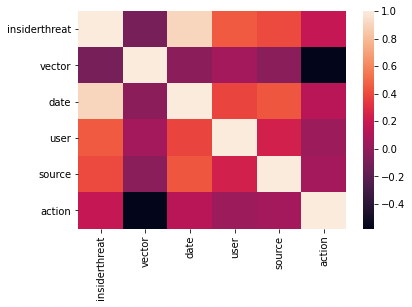

In [8]:
import seaborn as sns 
ax = sns.heatmap(corr)

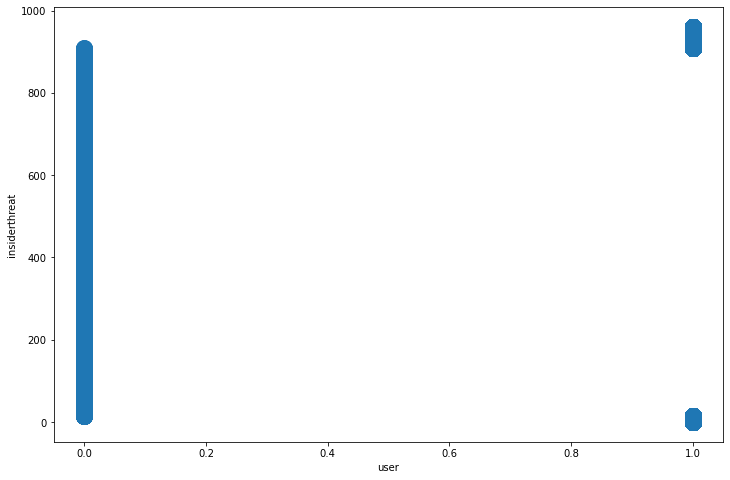

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df['insiderthreat'], df['user'], s=250)
plt.xlabel('user')
plt.ylabel('insiderthreat')
plt.show()

In [10]:

from sklearn.preprocessing import StandardScaler
df_arr = StandardScaler().fit_transform(df)

0         1         2         3         4         5
12266 -1.731441  0.811346 -0.080125 -0.864532 -0.116862 -0.215287
21900 -2.048559  0.583740  0.112478 -0.182689 -0.319533  0.463383
16217  1.476851  2.430623 -0.564327 -0.294006  0.981782  0.033702
1534  -1.255797  1.013625 -1.679603  1.075792 -0.161565  0.235341
1629   1.538912  0.953601  0.975360 -0.734944 -0.477876  0.216400
3978  -1.707373  0.466865 -0.057653 -0.677523 -0.478265 -0.061312
2183   0.334777  1.373309  0.311924  2.032569 -0.277137 -0.364831
2946  -0.302411  0.101650  1.923557  0.900297 -1.314308 -0.037317
5554   1.994946  1.116847  0.067244 -0.018354 -0.470880  0.111539
20828 -0.212209  1.362089  0.160479  2.232463 -0.170777  0.156399

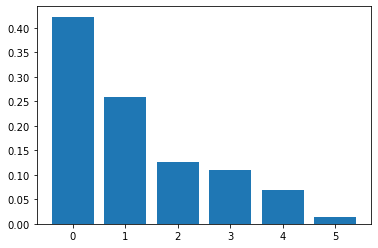

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(df_arr)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
PCA_components = pd.DataFrame(principalComponents)
PCA_components.sample(n=10)

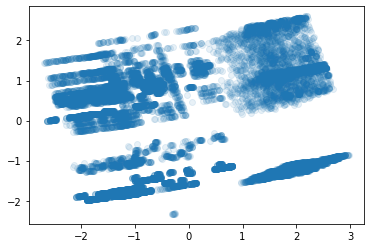

In [12]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)


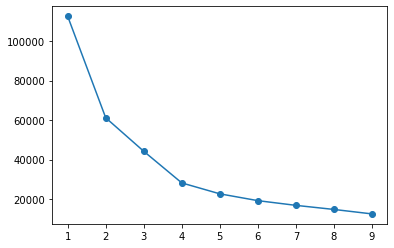

In [14]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o')
plt.show()